In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Retail Sales Analysis_utf.csv")

# Parse dates properly with dayfirst format
df['sale_date'] = pd.to_datetime(df['sale_date'], dayfirst=True)
df['sale_time'] = pd.to_datetime(df['sale_time'], format='%H:%M:%S').dt.time


### Q1. Retrieve all sales made on '2022-11-05'

In [ ]:

df[df['sale_date'] == '2022-11-05']


,transactions_id,sale_date,sale_time,customer_id,gender,age,category,quantity,price_per_unit,cogs,total_sale
0,180,2022-11-05,10:47:00,117,Male,41.0,Clothing,3.0,300.0,129.00,900.0
190,240,2022-11-05,11:49:00,95,Female,23.0,Beauty,1.0,300.0,123.00,300.0
259,1256,2022-11-05,09:58:00,29,Male,23.0,Clothing,2.0,500.0,190.00,1000.0
895,1587,2022-11-05,20:06:00,140,Female,40.0,Beauty,4.0,300.0,105.00,1200.0
929,1819,2022-11-05,20:44:00,83,Female,35.0,Beauty,2.0,50.0,13.50,100.0
1575,943,2022-11-05,19:29:00,90,Female,57.0,Clothing,4.0,300.0,318.00,1200.0
1647,1896,2022-11-05,20:19:00,87,Female,30.0,Electronics,2.0,25.0,30.75,50.0
1752,1137,2022-11-05,22:34:00,104,Male,46.0,Beauty,2.0,500.0,145.00,1000.0
1794,856,2022-11-05,17:43:00,102,Male,54.0,Electronics,4.0,30.0,9.30,120.0
1879,214,2022-11-05,16:31:00,53,Male,20.0,Beauty,2.0,30.0,8.10,60.0


### Q2. Retrieve all transactions where the category is 'Clothing' and the quantity sold is more than 10 in Nov 2022

In [ ]:

df[
    (df['category'] == 'Clothing') &
    (df['quantity'] > 10) &
    (df['sale_date'].dt.month == 11) &
    (df['sale_date'].dt.year == 2022)
]

,transactions_id,sale_date,sale_time,customer_id,gender,age,category,quantity,price_per_unit,cogs,total_sale


### Q3. Calculate the total sales (total_sale) for each category

In [ ]:

df.groupby('category')['total_sale'].sum()

category
Beauty         286840.0
Clothing       311070.0
Electronics    313810.0
Name: total_sale, dtype: float64

### Q4. Find the average age of customers who purchased items from the 'Beauty' category

In [ ]:

df[df['category'] == 'Beauty']['age'].mean()

np.float64(40.40619902120718)

### Q5. Retrieve all transactions where total_sale is greater than 1000

In [ ]:

df[df['total_sale'] > 1000]

,transactions_id,sale_date,sale_time,customer_id,gender,age,category,quantity,price_per_unit,cogs,total_sale
1,522,2022-07-09,11:00:00,52,Male,46.0,Beauty,3.0,500.0,145.0,1500.0
2,559,2022-12-12,10:48:00,5,Female,40.0,Clothing,4.0,300.0,84.0,1200.0
4,1522,2022-11-14,08:35:00,48,Male,46.0,Beauty,3.0,500.0,235.0,1500.0
5,1559,2022-08-20,07:40:00,49,Female,40.0,Clothing,4.0,300.0,144.0,1200.0
8,421,2022-04-08,08:43:00,66,Female,37.0,Clothing,3.0,500.0,235.0,1500.0
...,...,...,...,...,...,...,...,...,...,...,...
1989,908,2022-10-30,14:47:00,64,Male,46.0,Beauty,4.0,300.0,81.0,1200.0
1992,1805,2023-10-10,13:35:00,79,Female,30.0,Beauty,3.0,500.0,225.0,1500.0
1993,1908,2023-12-17,12:34:00,93,Male,46.0,Beauty,4.0,300.0,87.0,1200.0
1996,211,2022-09-12,14:02:00,54,Male,42.0,Beauty,3.0,500.0,235.0,1500.0


### Q6. Find the total number of transactions (transaction_id) made by each gender in each category

In [ ]:

df.groupby(['gender', 'category'])['transactions_id'].count()

gender  category   
Female  Beauty         332
        Clothing       348
        Electronics    340
Male    Beauty         282
        Clothing       354
        Electronics    344
Name: transactions_id, dtype: int64

### Q7. Calculate the average sale for each month and find the best-selling month in each year

In [ ]:

df['year'] = df['sale_date'].dt.year
df['month'] = df['sale_date'].dt.month

monthly_avg = df.groupby(['year', 'month'])['total_sale'].mean().reset_index(name='avg_monthly_sale')
best_months = monthly_avg.loc[monthly_avg.groupby('year')['avg_monthly_sale'].idxmax()]
monthly_avg, best_months

(    year  month  avg_monthly_sale
 0   2022      1        397.105263
 1   2022      2        366.136364
 2   2022      3        521.382979
 3   2022      4        486.525424
 4   2022      5        480.384615
 5   2022      6        481.395349
 6   2022      7        541.341463
 7   2022      8        385.363636
 8   2022      9        478.837209
 9   2022     10        467.363014
 10  2022     11        472.020548
 11  2022     12        464.203822
 12  2023      1        396.500000
 13  2023      2        535.531915
 14  2023      3        394.807692
 15  2023      4        466.489362
 16  2023      5        450.166667
 17  2023      6        438.482143
 18  2023      7        427.678571
 19  2023      8        495.964912
 20  2023      9        462.739726
 21  2023     10        399.172414
 22  2023     11        453.452381
 23  2023     12        490.390071,
     year  month  avg_monthly_sale
 6   2022      7        541.341463
 13  2023      2        535.531915)

### Q8. Find the top 5 customers based on the highest total sales

In [ ]:

df.groupby('customer_id')['total_sale'].sum().nlargest(5)

customer_id
3    38440.0
1    30750.0
5    30405.0
2    25295.0
4    23580.0
Name: total_sale, dtype: float64

### Q9. Find the number of unique customers who purchased items from each category

In [ ]:

df.groupby('category')['customer_id'].nunique()

category
Beauty         141
Clothing       149
Electronics    144
Name: customer_id, dtype: int64

### Q10. Create each shift and count the number of orders 
### (Morning <=12, Afternoon Between 12 & 17, Evening >17)

In [ ]:

def determine_shift(t):
    h = t.hour
    if h <= 12:
        return 'Morning'
    elif 12 < h <= 17:
        return 'Afternoon'
    else:
        return 'Evening'

df['shift'] = df['sale_time'].apply(determine_shift)
df.groupby('shift')['transactions_id'].count()

shift
Afternoon     348
Evening      1062
Morning       590
Name: transactions_id, dtype: int64

### What is the average order value (AOV)?

In [3]:
aov = df['total_sale'].mean()
print("Average Order Value (AOV):", round(aov, 2))

Average Order Value (AOV): 456.54


### Total revenue by gender

In [4]:
print("Revenue by Gender:\n", df.groupby('gender')['total_sale'].sum())

Revenue by Gender:
 gender
Female    465400.0
Male      446320.0
Name: total_sale, dtype: float64


### Most purchased category by each gender

In [5]:
most_purchased = df.groupby(['gender', 'category'])['transactions_id'].count().unstack().idxmax(axis=1)
print("Most purchased category by gender:\n", most_purchased)

Most purchased category by gender:
 gender
Female    Clothing
Male      Clothing
dtype: object


### Sales distribution by age group

In [6]:
bins = [17, 25, 35, 45, 55, 65, 100]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '65+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)
print("Sales by Age Group:\n", df.groupby('age_group')['total_sale'].sum())

Sales by Age Group:
 age_group
18-25    168960.0
26-35    196870.0
36-45    183665.0
46-55    200305.0
56-65    158430.0
65+           0.0
Name: total_sale, dtype: float64


C:\Users\YOCHANA\AppData\Local\Temp\ipykernel_9136\2374276327.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print("Sales by Age Group:\n", df.groupby('age_group')['total_sale'].sum())


### Total quantity sold per category

In [7]:
print("Total quantity sold per category:\n", df.groupby('category')['quantity'].sum())

Total quantity sold per category:
 category
Beauty         1535.0
Clothing       1785.0
Electronics    1698.0
Name: quantity, dtype: float64


###  Average quantity per order

In [8]:
print("Average Quantity per Order:", round(df['quantity'].mean(), 2))

Average Quantity per Order: 2.51


### Day of week with highest number of sales

In [9]:
df['day_name'] = df['sale_date'].dt.day_name()
print("Sales count by Day of Week:\n", df['day_name'].value_counts())

Sales count by Day of Week:
 day_name
Sunday       312
Saturday     309
Friday       290
Thursday     288
Monday       279
Wednesday    275
Tuesday      247
Name: count, dtype: int64


### Total Sales by Category (Bar Chart)

C:\Users\YOCHANA\AppData\Local\Temp\ipykernel_9136\2927967788.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


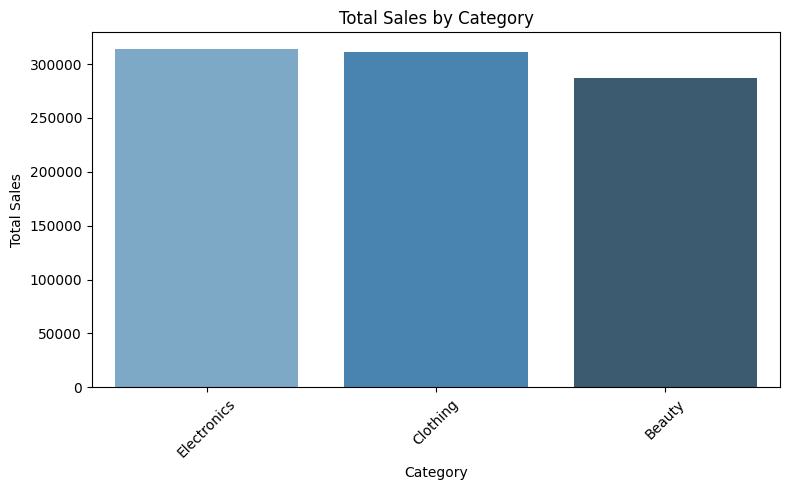

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

category_sales = df.groupby('category')['total_sale'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(
    x=category_sales.index,
    y=category_sales.values,
    palette=sns.color_palette("Blues_d", n_colors=len(category_sales)),
    legend=False
)
plt.title("Total Sales by Category")
plt.ylabel("Total Sales")
plt.xlabel("Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Monthly Sales Trend (Line Chart)

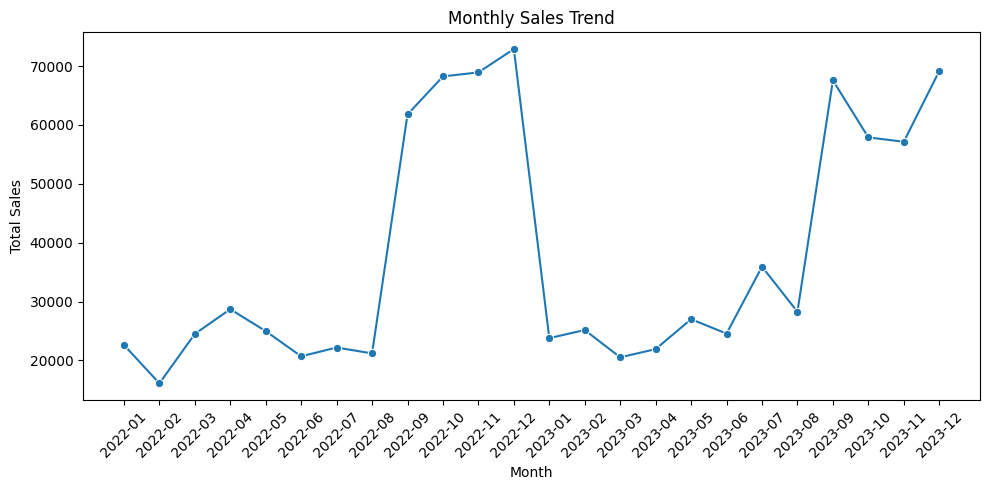

In [13]:
df['year_month'] = df['sale_date'].dt.to_period('M')
monthly_sales = df.groupby('year_month')['total_sale'].sum().reset_index()

monthly_sales['year_month'] = monthly_sales['year_month'].astype(str)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_sales, x='year_month', y='total_sale', marker="o")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Sales by Age Group (Bar Chart)

C:\Users\YOCHANA\AppData\Local\Temp\ipykernel_9136\3206318600.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=age_sales, x='age_group', y='total_sale', palette="coolwarm")


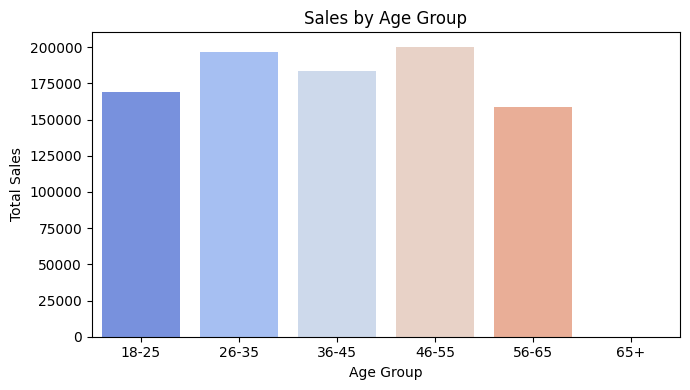

In [14]:
age_sales = df.groupby('age_group', observed=True)['total_sale'].sum().reset_index()

plt.figure(figsize=(7,4))
sns.barplot(data=age_sales, x='age_group', y='total_sale', palette="coolwarm")
plt.title("Sales by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()

### Orders by Shift (Pie Chart)

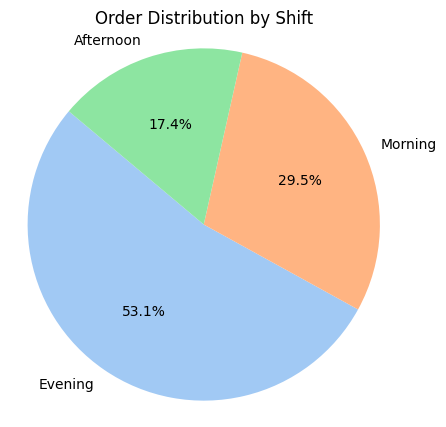

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

def determine_shift(t):
    hour = t.hour
    if hour <= 12:
        return 'Morning'
    elif 12 < hour <= 17:
        return 'Afternoon'
    else:
        return 'Evening'

df['shift'] = df['sale_time'].apply(determine_shift)

shift_orders = df['shift'].value_counts()

plt.figure(figsize=(5,5))
plt.pie(
    shift_orders.values,
    labels=shift_orders.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette("pastel")
)
plt.title("Order Distribution by Shift")
plt.axis('equal')  
plt.show()
